# Cleaning data

Sound level data from individual monitors has been merged together in to the file '2015to2021dublin_noise_pollution_mergeFile.csv'.

Here the data is checked for duplicate rows and missing values and instances of both are removed. The data is subsequently saved as '2015_2021noise_pollution_Cleaned.csv'.

In [1]:
# import libraries

import pandas as pd
import missingno as msno # missingno is a visualization module for missing data
import matplotlib.pyplot as plt

In [2]:
# read in csv file using pandas
df = pd.read_csv('../Data/datasets/2015to2021dublin_noise_pollution_mergeFile.csv'   , sep = '\t', index_col=[0], parse_dates = ['datetime'])

In [3]:
df.dtypes # check datetime is in datetime format and ensure noise data is in float format

datetime                   datetime64[ns]
laeq_BullIsland2                  float64
laeq_Ballyferm3                   float64
laeq_Ballymun4                    float64
laeq_DCCRowingClub5               float64
laeq_NavanRoad8                   float64
laeq_Raheny9                      float64
laeq_ChanceryPark11               float64
laeq_BlessingtonBasin12           float64
laeq_DolphinsBarn13               float64
dtype: object

In [4]:
# check for duplicate values and drop any duplicated rows

column_names = 'datetime' # pick columns to check for duplicate values

duplicates = df.duplicated(subset = column_names, keep = False) # check for duplicated values

df.drop_duplicates(subset = column_names, inplace = True) # Drop all duplicated date rows

df[duplicates] # can see no duplicates in data 

,datetime,laeq_BullIsland2,laeq_Ballyferm3,laeq_Ballymun4,laeq_DCCRowingClub5,laeq_NavanRoad8,laeq_Raheny9,laeq_ChanceryPark11,laeq_BlessingtonBasin12,laeq_DolphinsBarn13


In [5]:
# describe total missing values from each column

df.isnull().sum()

datetime                      0
laeq_BullIsland2           1941
laeq_Ballyferm3            3639
laeq_Ballymun4             1241
laeq_DCCRowingClub5        1038
laeq_NavanRoad8            1966
laeq_Raheny9               1441
laeq_ChanceryPark11        1982
laeq_BlessingtonBasin12     716
laeq_DolphinsBarn13        1531
dtype: int64

<AxesSubplot:>

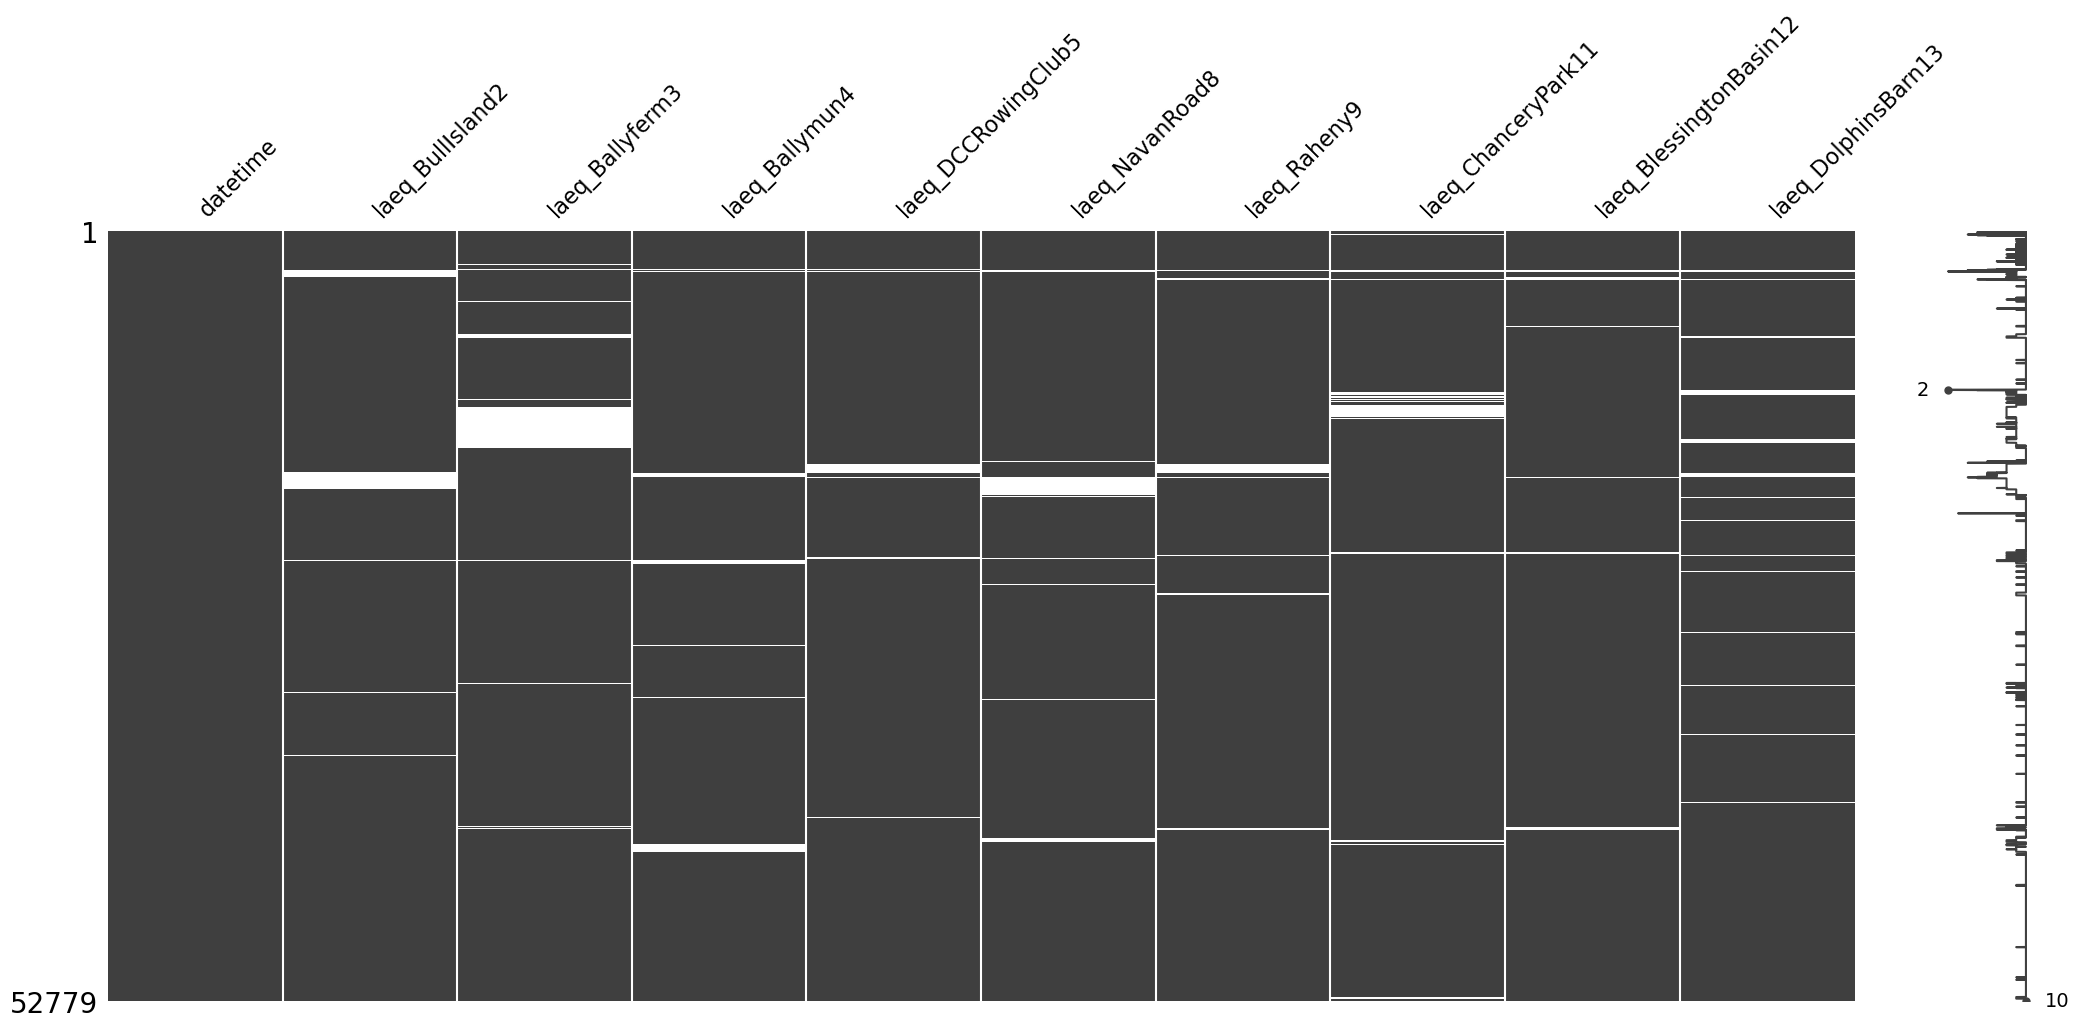

In [6]:
# visualize missing values using the missing number matrix function
msno.matrix(df)

In [7]:
#drop rows of missing values and keep the values dropped for this dataset
df.dropna(inplace=True)

# check missing values and visualize data missing values again
df.isnull().sum()

datetime                   0
laeq_BullIsland2           0
laeq_Ballyferm3            0
laeq_Ballymun4             0
laeq_DCCRowingClub5        0
laeq_NavanRoad8            0
laeq_Raheny9               0
laeq_ChanceryPark11        0
laeq_BlessingtonBasin12    0
laeq_DolphinsBarn13        0
dtype: int64

<AxesSubplot:>

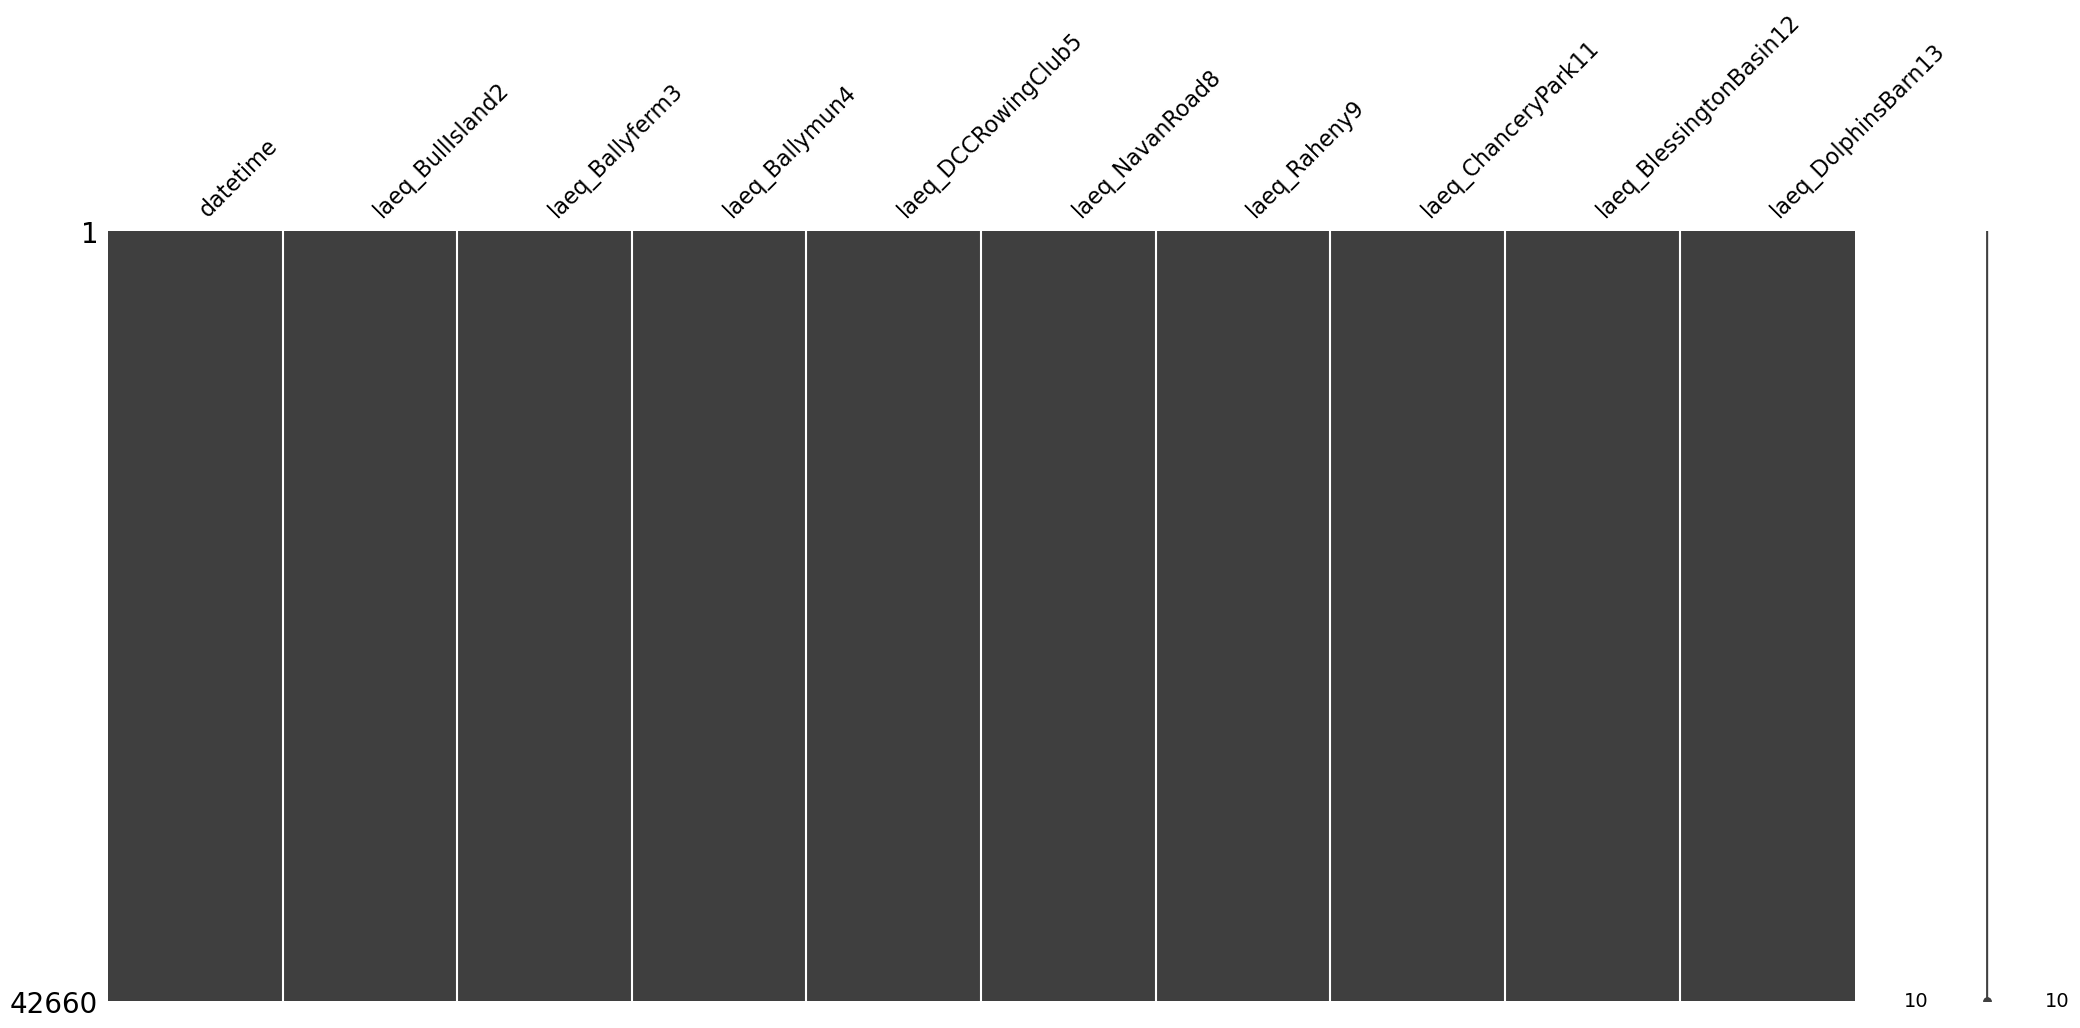

In [8]:
# visualize the missing numbers again - should be no missing numbers

msno.matrix(df)

In [9]:
# add in columns that will help with analysis including month name, day, day of the week, hour

df['month'] = df['datetime'].dt.month_name()
df['day_of_month'] = df['datetime'].dt.day
df['day_of_week'] = df['datetime'].dt.dayofweek
df['hour_of_day'] = df['datetime'].dt.hour
df['day_name'] = df['datetime'].dt.day_name()
df['date'] = df['datetime'].dt.date

In [10]:
# use a dictionary to map whether a day is part of the weekday or weekend

part_of_week = {
    'Monday':'weekday',
    'Tuesday':'weekday',
    'Wednesday':'weekday',
    'Thursday':'weekday',
    'Friday':'weekday',
    'Saturday':'weekend',
    'Sunday':'weekend',
}

# Use map method to map dictionary to annotate whether day is weekend or weekday

df['part_of_week'] = df['day_name'].map(part_of_week)

In [11]:
# write this to csv file and save to 'data' directory in datasets subfolder for subsequent analyses

df.to_csv('../Data/datasets/2015_2021noise_pollution_Cleaned.csv', sep='\t', index = False)
